In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
def convertToMatrix(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d, ])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [3]:
step = 4
N = 1000
Tp = 800

t = np.arange(0, N)
x = np.sin(0.02 * t) + 2 * np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.207294
1,0.834225
2,0.494042
3,1.479822
4,0.618880


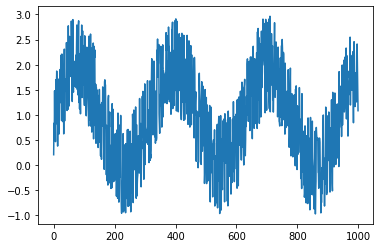

In [4]:
plt.plot(df)
plt.show()

In [12]:
values = df.values
train, test = values[0:Tp, :], values[Tp:N, :]
print(train.shape)

test = np.append(test, np.repeat(test[-1,], step))
train = np.append(train, np.repeat(train[-1,], step))

trainX, trainY = convertToMatrix(train, step)
testX, testY = convertToMatrix(test, step)

X_train = np.expand_dims(trainX, axis = 2)  #trainX의 차원수 늘림
X_test = np.expand_dims(testX, axis = 2)  #testX의 차원수 늘림
X_train.shape
trainX.shape

(800, 1)


(800, 4)

In [6]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences = False, input_shape = (4,1)))
model.add(Dense(1))
model.compile(loss = 'mse',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.fit(X_train, trainY, epochs = 200, verbose = 2)

Epoch 1/200
25/25 - 2s - loss: 0.5751 - accuracy: 0.0000e+00
Epoch 2/200
25/25 - 0s - loss: 0.4546 - accuracy: 0.0000e+00
Epoch 3/200
25/25 - 0s - loss: 0.4481 - accuracy: 0.0000e+00
Epoch 4/200
25/25 - 0s - loss: 0.4414 - accuracy: 0.0000e+00
Epoch 5/200
25/25 - 0s - loss: 0.4394 - accuracy: 0.0000e+00
Epoch 6/200
25/25 - 0s - loss: 0.4350 - accuracy: 0.0000e+00
Epoch 7/200
25/25 - 0s - loss: 0.4338 - accuracy: 0.0000e+00
Epoch 8/200
25/25 - 0s - loss: 0.4453 - accuracy: 0.0000e+00
Epoch 9/200
25/25 - 0s - loss: 0.4385 - accuracy: 0.0000e+00
Epoch 10/200
25/25 - 0s - loss: 0.4355 - accuracy: 0.0000e+00
Epoch 11/200
25/25 - 0s - loss: 0.4324 - accuracy: 0.0000e+00
Epoch 12/200
25/25 - 0s - loss: 0.4373 - accuracy: 0.0000e+00
Epoch 13/200
25/25 - 0s - loss: 0.4309 - accuracy: 0.0000e+00
Epoch 14/200
25/25 - 0s - loss: 0.4265 - accuracy: 0.0000e+00
Epoch 15/200
25/25 - 0s - loss: 0.4313 - accuracy: 0.0000e+00
Epoch 16/200
25/25 - 0s - loss: 0.4357 - accuracy: 0.0000e+00
Epoch 17/200
25/2

Epoch 133/200
25/25 - 0s - loss: 0.3947 - accuracy: 0.0000e+00
Epoch 134/200
25/25 - 0s - loss: 0.3904 - accuracy: 0.0000e+00
Epoch 135/200
25/25 - 0s - loss: 0.3867 - accuracy: 0.0000e+00
Epoch 136/200
25/25 - 0s - loss: 0.3831 - accuracy: 0.0000e+00
Epoch 137/200
25/25 - 0s - loss: 0.3847 - accuracy: 0.0000e+00
Epoch 138/200
25/25 - 0s - loss: 0.3888 - accuracy: 0.0000e+00
Epoch 139/200
25/25 - 0s - loss: 0.3913 - accuracy: 0.0000e+00
Epoch 140/200
25/25 - 0s - loss: 0.3872 - accuracy: 0.0000e+00
Epoch 141/200
25/25 - 0s - loss: 0.3841 - accuracy: 0.0000e+00
Epoch 142/200
25/25 - 0s - loss: 0.3841 - accuracy: 0.0000e+00
Epoch 143/200
25/25 - 0s - loss: 0.3851 - accuracy: 0.0000e+00
Epoch 144/200
25/25 - 0s - loss: 0.3852 - accuracy: 0.0000e+00
Epoch 145/200
25/25 - 0s - loss: 0.3813 - accuracy: 0.0000e+00
Epoch 146/200
25/25 - 0s - loss: 0.3910 - accuracy: 0.0000e+00
Epoch 147/200
25/25 - 0s - loss: 0.3833 - accuracy: 0.0000e+00
Epoch 148/200
25/25 - 0s - loss: 0.3845 - accuracy: 0.0

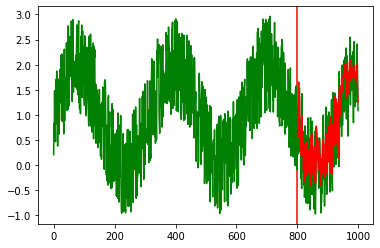

In [7]:
pred = model.predict(X_test)
pred_df = pd.DataFrame(pred)
pred_df.index = np.arange(800, 1000)  #뒤에서 200개가 테스트이기 때문에 index의 범위를 800~으로 설정

plt.axvline(x = 800, color = 'r')
plt.plot(df, color = 'g')
plt.plot(pred_df, color = 'r')

plt.show()

In [10]:
print(model.summary())
print(pred)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
None
[[ 0.6406801 ]
 [ 0.55500346]
 [ 0.690348  ]
 [ 0.8143181 ]
 [ 1.6564395 ]
 [ 1.2806818 ]
 [ 1.3941699 ]
 [ 1.2879505 ]
 [ 0.52532566]
 [ 0.29925668]
 [ 0.36877453]
 [ 0.21273914]
 [ 0.75171286]
 [ 0.19860399]
 [ 0.2577296 ]
 [ 0.97500443]
 [ 0.20009106]
 [ 0.3719203 ]
 [ 0.22558282]
 [ 0.6026088 ]
 [-0.10646652]
 [ 0.3111816 ]
 [ 0.2935253 ]
 [-0.33486044]
 [ 0.06729536]
 [ 0.3442968 ]
 [ 0.42327613]
 [-0.21733667]
 [-0.10989545]
 [-0.06873667]
 [ 0.18344103]
 [ 0.4136991 ]
 [ 0.46478385]
 [-0.19660799]
 